## Be noted that if we want to run region1 or region2, make sure you re-run the loading step

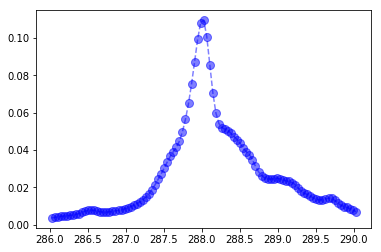

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
data = pd.read_csv('/Users/hsin-yiwang/Desktop/New_CO_discuss/Elias_sim01eV.csv')
xdata_ref = data['eV']
ydata_ref = data['Int']
plt.plot(xdata_ref, ydata_ref, color = 'b',alpha=0.5, markersize = 8, marker = 'o', ls = '--')
plt.show()

[0.0034339  0.04727647 0.04853154 0.00286755 0.00169625 0.00758718
 0.0065941  0.0266778  0.08139805 0.00044992 0.02509461 0.08930226
 0.00075381 0.02793282 0.05389474 0.00020232]


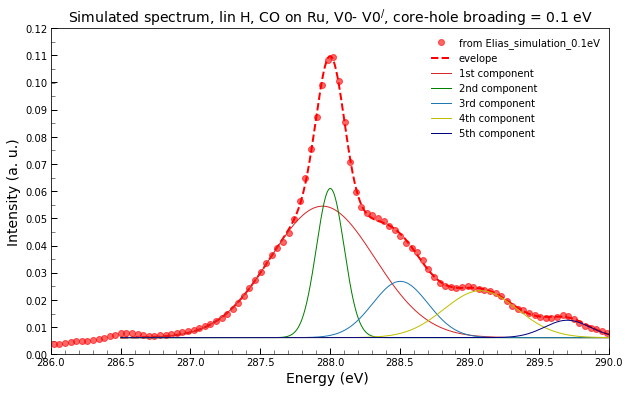

In [264]:
from scipy import optimize
from scipy.optimize import curve_fit
import peakutils 

def gaussian(x,h,c,w,o):
    return np.abs(h)*np.exp(-4*np.log(2)*(x-c)**2./(w**2))+o


def five_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, h4, c4, w4, h5, c5, w5,offset):
    return (gaussian(x, h1, c1, w1, o=0) +
            gaussian(x, h2, c2, w2, o=0) +
            gaussian(x, h3, c3, w3, o=0) +
            gaussian(x, h4, c4, w4, o=0) +
            gaussian(x, h5, c5, w5, o=0) + offset)

def poly2(x, a, b, c):
    return a*x**2 + b*x + c

def fit(function,x,y,p0=None,sigma=None,bounds=None):
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma)
    xc = np.arange(286.5,290,1e-3)
    curve = function(xc,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,xc,curve,perr

baseline_values = peakutils.baseline(ydata_ref) # provide the y value of baseline
optim1,xc,curve1,perr1 = fit(poly2,xdata_ref,baseline_values)

guess5 = [0.5, 287.5, 0.6, 0.7, 288, 0.2, 0.3, 288.4, 0.2, 0.7, 289.1, 0.2, 0.7, 289.5, 0.2, 0.1] 
optim5,xc,curve5,perr5 = fit(five_gaussians,xdata_ref,ydata_ref,p0=[guess5])
print (perr5)

parmpeak1 = []
parmpeak2 = []
parmpeak3 = []
parmpeak4 = []
parmpeak1.extend(optim5[0:3])
parmpeak1.extend([optim5[-1]]) # be careful about the double [[]]
parmpeak2.extend(optim5[3:6])
parmpeak2.extend([optim5[-1]])
parmpeak3.extend(optim5[6:9])
parmpeak3.extend([optim5[-1]])
parmpeak4.extend(optim5[9:12])
parmpeak4.extend([optim5[-1]])
parmpeak5 = optim5[12:]

plt.figure(figsize=[10,6])
ax = plt.gca()
plt.plot(xdata_ref, ydata_ref, color = 'r',alpha=0.6, markersize = 6, marker = 'o', ls = 'none',label='from Elias_simulation_0.1eV')
plt.plot(xc, curve5, lw=2, c='r', ls='--', label='evelope')
plt.plot(xc, gaussian(xc, *parmpeak1), lw=1, c='tab:red', ls='-', label='1st component')
plt.plot(xc, gaussian(xc, *parmpeak2), lw=1, c='g', ls='-', label='2nd component')
plt.plot(xc, gaussian(xc, *parmpeak3), lw=1, c='tab:blue', ls='-', label='3rd component')
plt.plot(xc, gaussian(xc, *parmpeak4), lw=1, c='y', ls='-', label='4th component')
plt.plot(xc, gaussian(xc, *parmpeak5), lw=1, c='navy', ls='-', label='5th component')
#plt.plot(xdata, baseline_values, lw=1, c='k', ls='-', label='baseline')
#plt.plot(xc, curve1, lw=1, c='k', ls='-', label='baseline')


plt.tick_params(direction='in', length=6, width=1, axis='both', which='major', labelsize=10)
plt.tick_params(direction='in', length=4, width=0.5, axis='both', which='minor', labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
plt.legend(frameon=False,loc='best', prop={'size': 10})
plt.title('Simulated spectrum, lin H, CO on Ru, V0- $\mathregular{V0^/}$, core-hole broading = 0.1 eV ', size=14)
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (a. u.)',size=14)
plt.xlim(286,290)
plt.ylim(0,0.12)
#plt.savefig('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/simulated_linH_spectrum_fitting', dpi=300)
plt.show()

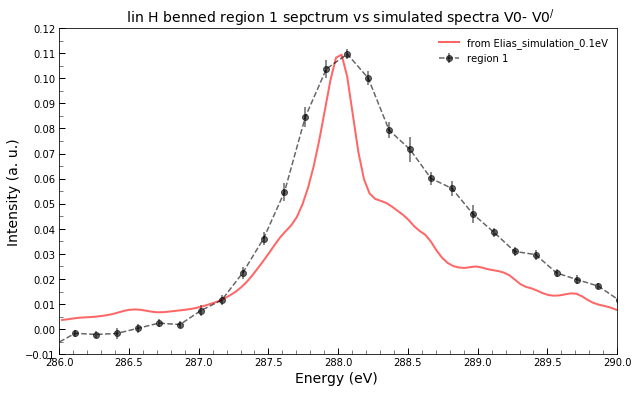

In [265]:
data1 = pd.read_csv('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/re1_wBG.csv')
data2 = pd.read_csv('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/re1_woBG.csv')
BGdata = pd.read_csv('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/BG4re1.csv')
xdata_H = data1['eV']
ydata_H = data1['Int']
yerr_H = data1['err']
xdatawoBG_H = data2['eV']
ydatawoBG_H = data2['Int']
xdata_BG = BGdata['eV']
ydata_BG = BGdata['Int']

plt.figure(figsize=[10,6])
ax = plt.gca()
plt.plot(xdata_ref, ydata_ref, color = 'r',alpha=0.6, lw = 2, ls = '-',label='from Elias_simulation_0.1eV')
plt.errorbar(xdata_H, ydata_H, yerr = yerr_H, color = 'k',alpha=0.6, markersize = 6, marker = 'o', ecolor = 'k', ls = '--',label='region 1')
plt.tick_params(direction='in', length=6, width=1, axis='both', which='major', labelsize=10)
plt.tick_params(direction='in', length=4, width=0.5, axis='both', which='minor', labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
plt.legend(frameon=False,loc='best', prop={'size': 10})
plt.title(' lin H benned region 1 sepctrum vs simulated spectra V0- $\mathregular{V0^/}$', size=14)
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (a. u.)',size=14)
plt.xlim(286,290)
plt.ylim(-0.01,0.12)
plt.savefig('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/lin_H_benned_region1_sepctrum_vs_simulated_spectra', dpi=300)
plt.show()

In [266]:
pref = optim5

gap1 = pref[4]-pref[1]
gap2 = pref[7]-pref[1]
gap3 = pref[10]-pref[1]
gap4 = pref[13]-pref[1]

def poly2(x, a, b, c):
    return a*x**2 + b*x + c

optim_BG,xc,curve_BG,perr_BG = fit(poly2,xdata_BG,ydata_BG)
curve_BG = np.array(curve_BG)

def ref_gaussians(x,amp,c,offset):
    return amp*(gaussian(x, pref[0], c, pref[2], o=0) +
            gaussian(x, pref[3], c+gap1, pref[5], o=0) +
            gaussian(x, pref[6], c+gap2, pref[8], o=0) +
            gaussian(x, pref[9], c+gap3, pref[11], o=0) +
            gaussian(x, pref[12], c+gap4, pref[14], o=0)) + offset

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


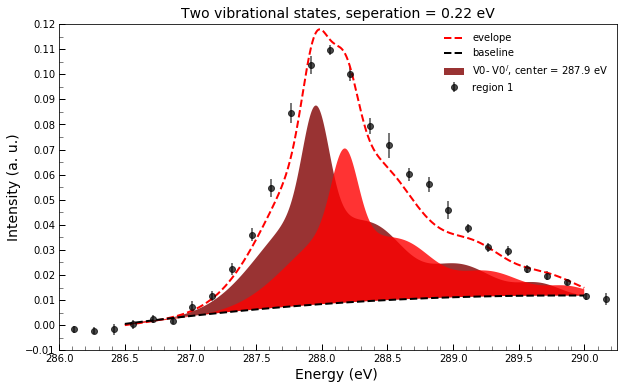

In [267]:
def sepc_gaussians(x,amp1, amp2, c1,offsets):
    c1=287.9
    c2=c1+0.22
    return ref_gaussians(x,amp1,c1,offset = 0) + ref_gaussians(x,amp2,c2,offset = 0)  + offsets

guess_s = [1,0.5,287.9,0.1]
optim_s,xc,curve_s,perr_s = fit(sepc_gaussians,xdatawoBG_H,ydatawoBG_H,p0=[guess_s])

parmvib1 = [optim_s[0],optim_s[2],optim_s[-1]]
parmvib2 = [optim_s[1],optim_s[2]+0.22,optim_s[-1]]

shift = -0.003
curveb1 = np.array(ref_gaussians(xc, *parmvib1))+curve_BG+shift
curveb2 = np.array(ref_gaussians(xc, *parmvib2))+curve_BG+shift


plt.figure(figsize=[10,6])

plt.errorbar(xdata_H, ydata_H, yerr = yerr_H, color = 'k',alpha=0.7, markersize = 6, marker = 'o', ecolor = 'k', ls = 'none',label='region 1')
plt.plot(xc, np.array(curve_s)+curve_BG+shift, lw=2, c='r', ls='--', label='evelope')
plt.fill_between(xc, curveb1, curve_BG, alpha=0.8, facecolor='maroon', label='V0- $\mathregular{V0^/}$, center = %03s eV'%optim_s[2])
plt.fill_between(xc, curveb2, curve_BG, alpha=0.8, facecolor='r')
plt.plot(xc, curve_BG, lw=2, c='k', ls='--', label='baseline')

ax = plt.gca()
plt.tick_params(direction='in', length=6, width=1, axis='both', which='major', labelsize=10)
plt.tick_params(direction='in', length=4, width=0.5, axis='both', which='minor', labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
plt.legend(frameon=False,loc='best', prop={'size': 10})
plt.title('Two vibrational states, seperation = 0.22 eV', size=14)
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (a. u.)',size=14)
plt.xlim(286,290.25)
plt.ylim(-0.01,0.12)
plt.savefig('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/Two_vibtratinoal_state_287_9eV', dpi=300)
plt.show()

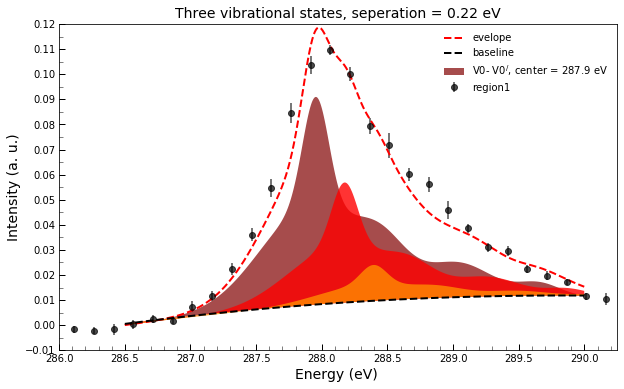

In [272]:
def sepc_gaussians(x,amp1,amp2, amp3, c1,offsets):
    c1=287.9
    c2=c1+0.22
    c3=c2+0.22
    
    return ref_gaussians(x,amp1,c1,offset = 0) + ref_gaussians(x,amp2,c2,offset = 0) + ref_gaussians(x,amp3,c3,offset = 0) + offsets

guess_s = [1,0.5,0.3, 287.9,0.1]
optim_s,xc,curve_s,perr_s = fit(sepc_gaussians,xdatawoBG_H,ydatawoBG_H,p0=[guess_s])

parmvib1 = [optim_s[0],optim_s[3],optim_s[-1]]
parmvib2 = [optim_s[1],optim_s[3]+0.22,optim_s[-1]]
parmvib3 = [optim_s[2],optim_s[3]+0.22*2,optim_s[-1]]

shift = -0.002
curveb1 = np.array(ref_gaussians(xc, *parmvib1))+curve_BG+shift
curveb2 = np.array(ref_gaussians(xc, *parmvib2))+curve_BG+shift
curveb3 = np.array(ref_gaussians(xc, *parmvib3))+curve_BG+shift

plt.figure(figsize=[10,6])

plt.errorbar(xdata_H, ydata_H, yerr = yerr_H, color = 'k',alpha=0.7, markersize = 6, marker = 'o', ecolor = 'k', ls = 'none',label='region1')

plt.plot(xc, np.array(curve_s)+curve_BG+shift, lw=2, c='r', ls='--', label='evelope')

plt.fill_between(xc, curveb1, curve_BG, alpha=0.7, facecolor='maroon', label='V0- $\mathregular{V0^/}$, center = %01s eV'%optim_s[3])
plt.fill_between(xc, curveb2, curve_BG, alpha=0.8, facecolor='r')
plt.fill_between(xc, curveb3, curve_BG, alpha=0.8, facecolor='darkorange')
plt.plot(xc, curve_BG, lw=2, c='k', ls='--', label='baseline')

ax = plt.gca()
plt.tick_params(direction='in', length=6, width=1, axis='both', which='major', labelsize=10)
plt.tick_params(direction='in', length=4, width=0.5, axis='both', which='minor', labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
plt.legend(frameon=False,loc='best', prop={'size': 10})
plt.title('Three vibrational states, seperation = 0.22 eV', size=14)
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (a. u.)',size=14)
plt.xlim(286,290.25)
plt.ylim(-0.01,0.12)
#plt.savefig('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/Three_vibtratinoal_state_287_9eV', dpi=300)
plt.show()

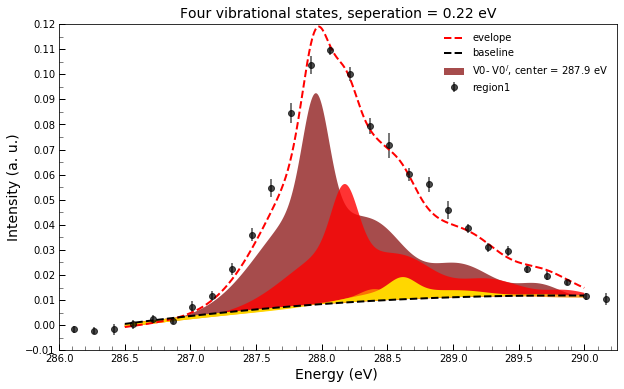

In [246]:
def sepc_gaussians(x,amp1,amp2, amp3, amp4, c1,offsets):
    c1=287.9
    c2=c1+0.22
    c3=c2+0.22
    c4=c3+0.22
    return ref_gaussians(x,amp1,c1,offset = 0) + ref_gaussians(x,amp2,c2,offset = 0) + ref_gaussians(x,amp3,c3,offset = 0) + ref_gaussians(x,amp4,c4,offset = 0)  + offsets

guess_s = [1,0.5,0.3,0.1, 287.9,0.1]
optim_s,xc,curve_s,perr_s = fit(sepc_gaussians,xdatawoBG_H,ydatawoBG_H,p0=[guess_s])

parmvib1 = [optim_s[0],optim_s[4],optim_s[-1]]
parmvib2 = [optim_s[1],optim_s[4]+0.22,optim_s[-1]]
parmvib3 = [optim_s[2],optim_s[4]+0.22*2,optim_s[-1]]
parmvib4 = [optim_s[3],optim_s[4]+0.22*3,optim_s[-1]]

shift = -0.002
curveb1 = np.array(ref_gaussians(xc, *parmvib1))+curve_BG+shift
curveb2 = np.array(ref_gaussians(xc, *parmvib2))+curve_BG+shift
curveb3 = np.array(ref_gaussians(xc, *parmvib3))+curve_BG+shift
curveb4 = np.array(ref_gaussians(xc, *parmvib4))+curve_BG+shift


plt.figure(figsize=[10,6])

plt.errorbar(xdata_H, ydata_H, yerr = yerr_H, color = 'k',alpha=0.7, markersize = 6, marker = 'o', ecolor = 'k', ls = 'none',label='region1')

plt.plot(xc, np.array(curve_s)+curve_BG+shift, lw=2, c='r', ls='--', label='evelope')

plt.fill_between(xc, curveb1, curve_BG, alpha=0.7, facecolor='maroon', label='V0- $\mathregular{V0^/}$, center = %01s eV'%optim_s[4])
plt.fill_between(xc, curveb2, curve_BG, alpha=0.8, facecolor='r')
plt.fill_between(xc, curveb3, curve_BG, alpha=0.8, facecolor='darkorange')
plt.fill_between(xc, curveb4, curve_BG, alpha=1, facecolor='gold')
plt.plot(xc, curve_BG, lw=2, c='k', ls='--', label='baseline')

ax = plt.gca()
plt.tick_params(direction='in', length=6, width=1, axis='both', which='major', labelsize=10)
plt.tick_params(direction='in', length=4, width=0.5, axis='both', which='minor', labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
plt.legend(frameon=False,loc='best', prop={'size': 10})
plt.title('Four vibrational states, seperation = 0.22 eV', size=14)
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (a. u.)',size=14)
plt.xlim(286,290.25)
plt.ylim(-0.01,0.12)
plt.savefig('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/Four_vibtratinoal_state_287_9eV', dpi=300)
plt.show()



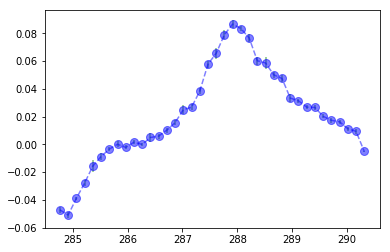

In [250]:
data1 = pd.read_csv('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/re2_wBG.csv')
data2 = pd.read_csv('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/re2_woBG.csv')
BGdata = pd.read_csv('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/BG4re2.csv')
xdata_H = data1['eV']
ydata_H = data1['Int']
yerr_H = data1['err']
xdatawoBG_H = data2['eV']
ydatawoBG_H = data2['Int']
xdata_BG = BGdata['eV']
ydata_BG = BGdata['Int']
plt.errorbar(xdata_H, ydata_H, yerr = yerr_H, color = 'b',alpha=0.5, markersize = 8, marker = 'o', ecolor = 'g', ls = '--')
plt.show()

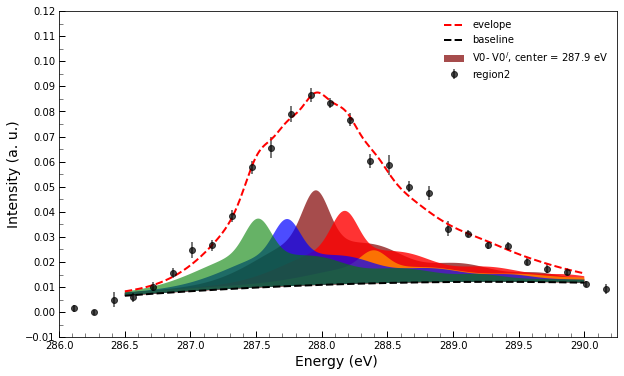

In [254]:
def sepc_gaussians(x,amp1,amp2, amp3, amp5, amp6,c1,offsets):
    c1=287.9
    c2=c1+0.22
    c3=c2+0.22
    #c4=c3+0.22
    c5=c1-0.22
    c6=c5-0.22
    #c7=c6-0.22
    return (ref_gaussians(x,amp1,c1,offset = 0) + 
            ref_gaussians(x,amp2,c2,offset = 0) + 
            ref_gaussians(x,amp3,c3,offset = 0) + 
            #ref_gaussians(x,amp4,c4,offset = 0) + 
            ref_gaussians(x,amp5,c5,offset = 0) + 
            ref_gaussians(x,amp6,c6,offset = 0) + offsets)
            #ref_gaussians(x,amp7,c7,offset = 0) + offsets)

guess_s = [1,0.5,0.3,0.2, 0.1, 287.9,0.1]
optim_s,xc,curve_s,perr_s = fit(sepc_gaussians,xdatawoBG_H,ydatawoBG_H,p0=[guess_s])

parmvib1 = [optim_s[0],optim_s[5],optim_s[-1]]
parmvib2 = [optim_s[1],optim_s[5]+0.22,optim_s[-1]]
parmvib3 = [optim_s[2],optim_s[5]+0.22*2,optim_s[-1]]
#parmvib4 = [optim_s[3],optim_s[6]+0.22*3,optim_s[-1]]
parmvib5 = [optim_s[3],optim_s[5]-0.22,optim_s[-1]]
parmvib6 = [optim_s[4],optim_s[5]-0.22*2,optim_s[-1]]
#parmvib7 = [optim_s[6],optim_s[7]-0.22*3,optim_s[-1]]

shift = -0.00
curveb1 = np.array(ref_gaussians(xc, *parmvib1))+curve_BG+shift
curveb2 = np.array(ref_gaussians(xc, *parmvib2))+curve_BG+shift
curveb3 = np.array(ref_gaussians(xc, *parmvib3))+curve_BG+shift
#curveb4 = np.array(ref_gaussians(xc, *parmvib4))+curve_BG+shift
curveb5 = np.array(ref_gaussians(xc, *parmvib5))+curve_BG+shift
curveb6 = np.array(ref_gaussians(xc, *parmvib6))+curve_BG+shift
#curveb7 = np.array(ref_gaussians(xc, *parmvib7))+curve_BG+shift

optim_BG,xc,curve_BG,perr_BG = fit(poly2,xdata_BG,ydata_BG)
curve_BG = np.array(curve_BG)

plt.figure(figsize=[10,6])

plt.errorbar(xdata_H, ydata_H, yerr = yerr_H, color = 'k',alpha=0.7, markersize = 6, marker = 'o', ecolor = 'k', ls = 'none',label='region2')

plt.plot(xc, np.array(curve_s)+curve_BG+shift, lw=2, c='r', ls='--', label='evelope')

plt.fill_between(xc, curveb1, curve_BG, alpha=0.7, facecolor='maroon', label='V0- $\mathregular{V0^/}$, center = %03s eV'%optim_s[5])
plt.fill_between(xc, curveb2, curve_BG, alpha=0.8, facecolor='r')
plt.fill_between(xc, curveb3, curve_BG, alpha=0.8, facecolor='darkorange')
#plt.fill_between(xc, curveb4, curve_BG, alpha=1, facecolor='gold')
plt.fill_between(xc, curveb5, curve_BG, alpha=0.7, facecolor='b')
plt.fill_between(xc, curveb6, curve_BG, alpha=0.6, facecolor='g')
#plt.fill_between(xc, curveb7, curve_BG, alpha=1, facecolor='k')
plt.plot(xc, curve_BG, lw=2, c='k', ls='--', label='baseline')

ax = plt.gca()
plt.tick_params(direction='in', length=6, width=1, axis='both', which='major', labelsize=10)
plt.tick_params(direction='in', length=4, width=0.5, axis='both', which='minor', labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
plt.legend(frameon=False,loc='best', prop={'size': 10})
#plt.title('Five vibrational states, seperation = 0.22 eV', size=14)
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (a. u.)',size=14)
plt.xlim(286,290.25)
plt.ylim(-0.01,0.12)
plt.savefig('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/re2_five_vibtratinoal_state_287_9eV', dpi=300)
plt.show()

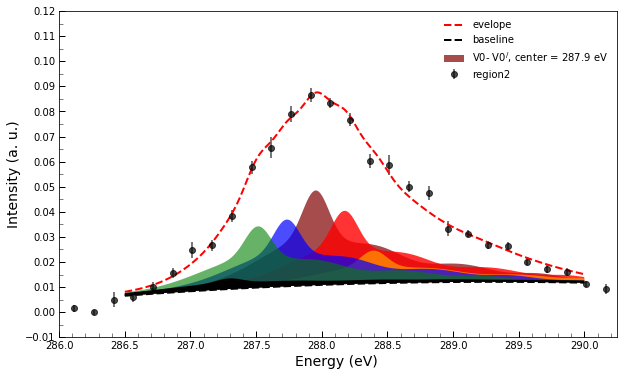

In [252]:
def sepc_gaussians(x,amp1,amp2, amp3, amp5, amp6,amp7,c1,offsets):
    c1=287.9
    c2=c1+0.22
    c3=c2+0.22
    #c4=c3+0.22
    c5=c1-0.22
    c6=c5-0.22
    c7=c6-0.22
    return (ref_gaussians(x,amp1,c1,offset = 0) + 
            ref_gaussians(x,amp2,c2,offset = 0) + 
            ref_gaussians(x,amp3,c3,offset = 0) + 
            #ref_gaussians(x,amp4,c4,offset = 0) + 
            ref_gaussians(x,amp5,c5,offset = 0) + 
            ref_gaussians(x,amp6,c6,offset = 0) + 
            ref_gaussians(x,amp7,c7,offset = 0) + offsets)

guess_s = [1,0.5,0.3,0.2, 0.1, 0.05, 287.9,0.1]
optim_s,xc,curve_s,perr_s = fit(sepc_gaussians,xdatawoBG_H,ydatawoBG_H,p0=[guess_s])

parmvib1 = [optim_s[0],optim_s[6],optim_s[-1]]
parmvib2 = [optim_s[1],optim_s[6]+0.22,optim_s[-1]]
parmvib3 = [optim_s[2],optim_s[6]+0.22*2,optim_s[-1]]
#parmvib4 = [optim_s[3],optim_s[6]+0.22*3,optim_s[-1]]
parmvib5 = [optim_s[3],optim_s[6]-0.22,optim_s[-1]]
parmvib6 = [optim_s[4],optim_s[6]-0.22*2,optim_s[-1]]
parmvib7 = [optim_s[5],optim_s[6]-0.22*3,optim_s[-1]]

shift = -0.00
curveb1 = np.array(ref_gaussians(xc, *parmvib1))+curve_BG+shift
curveb2 = np.array(ref_gaussians(xc, *parmvib2))+curve_BG+shift
curveb3 = np.array(ref_gaussians(xc, *parmvib3))+curve_BG+shift
#curveb4 = np.array(ref_gaussians(xc, *parmvib4))+curve_BG+shift
curveb5 = np.array(ref_gaussians(xc, *parmvib5))+curve_BG+shift
curveb6 = np.array(ref_gaussians(xc, *parmvib6))+curve_BG+shift
curveb7 = np.array(ref_gaussians(xc, *parmvib7))+curve_BG+shift

optim_BG,xc,curve_BG,perr_BG = fit(poly2,xdata_BG,ydata_BG)
curve_BG = np.array(curve_BG)

plt.figure(figsize=[10,6])

plt.errorbar(xdata_H, ydata_H, yerr = yerr_H, color = 'k',alpha=0.7, markersize = 6, marker = 'o', ecolor = 'k', ls = 'none',label='region2')

plt.plot(xc, np.array(curve_s)+curve_BG+shift, lw=2, c='r', ls='--', label='evelope')

plt.fill_between(xc, curveb1, curve_BG, alpha=0.7, facecolor='maroon', label='V0- $\mathregular{V0^/}$, center = %03s eV'%optim_s[6])
plt.fill_between(xc, curveb2, curve_BG, alpha=0.8, facecolor='r')
plt.fill_between(xc, curveb3, curve_BG, alpha=0.8, facecolor='darkorange')
#plt.fill_between(xc, curveb4, curve_BG, alpha=1, facecolor='gold')
plt.fill_between(xc, curveb5, curve_BG, alpha=0.7, facecolor='b')
plt.fill_between(xc, curveb6, curve_BG, alpha=0.6, facecolor='g')
plt.fill_between(xc, curveb7, curve_BG, alpha=1, facecolor='k')
plt.plot(xc, curve_BG, lw=2, c='k', ls='--', label='baseline')

ax = plt.gca()
plt.tick_params(direction='in', length=6, width=1, axis='both', which='major', labelsize=10)
plt.tick_params(direction='in', length=4, width=0.5, axis='both', which='minor', labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
plt.legend(frameon=False,loc='best', prop={'size': 10})
#plt.title('Five vibrational states, seperation = 0.22 eV', size=14)
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (a. u.)',size=14)
plt.xlim(286,290.25)
plt.ylim(-0.01,0.12)
plt.savefig('/Users/hsin-yiwang/Desktop/New_CO_discuss/python_fitting/re2_six_vibtratinoal_state_287_9eV', dpi=300)
plt.show()

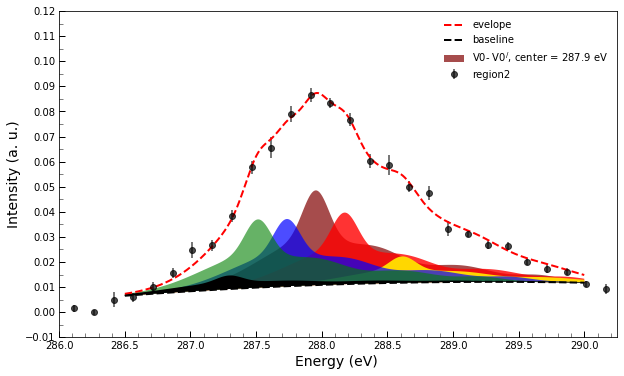

In [255]:
def sepc_gaussians(x,amp1,amp2, amp3, amp4, amp5, amp6,amp7, c1,offsets):
    c1=287.9
    c2=c1+0.22
    c3=c2+0.22
    c4=c3+0.22
    c5=c1-0.22
    c6=c5-0.22
    #c7=c6-0.22
    return (ref_gaussians(x,amp1,c1,offset = 0) + 
            ref_gaussians(x,amp2,c2,offset = 0) + 
            ref_gaussians(x,amp3,c3,offset = 0) + 
            ref_gaussians(x,amp4,c4,offset = 0) + 
            ref_gaussians(x,amp5,c5,offset = 0) + 
            ref_gaussians(x,amp6,c6,offset = 0) + offsets)
            #ref_gaussians(x,amp7,c7,offset = 0) + offsets)

guess_s = [1,0.5,0.3,0.1, 0.2, 0.1, 0.05, 287.9,0.1]
optim_s,xc,curve_s,perr_s = fit(sepc_gaussians,xdatawoBG_H,ydatawoBG_H,p0=[guess_s])

parmvib1 = [optim_s[0],optim_s[7],optim_s[-1]]
parmvib2 = [optim_s[1],optim_s[7]+0.22,optim_s[-1]]
parmvib3 = [optim_s[2],optim_s[7]+0.22*2,optim_s[-1]]
parmvib4 = [optim_s[3],optim_s[7]+0.22*3,optim_s[-1]]
parmvib5 = [optim_s[4],optim_s[7]-0.22,optim_s[-1]]
parmvib6 = [optim_s[5],optim_s[7]-0.22*2,optim_s[-1]]
parmvib7 = [optim_s[6],optim_s[7]-0.22*3,optim_s[-1]]

shift = 0
curveb1 = np.array(ref_gaussians(xc, *parmvib1))+curve_BG+shift
curveb2 = np.array(ref_gaussians(xc, *parmvib2))+curve_BG+shift
curveb3 = np.array(ref_gaussians(xc, *parmvib3))+curve_BG+shift
curveb4 = np.array(ref_gaussians(xc, *parmvib4))+curve_BG+shift
curveb5 = np.array(ref_gaussians(xc, *parmvib5))+curve_BG+shift
curveb6 = np.array(ref_gaussians(xc, *parmvib6))+curve_BG+shift
curveb7 = np.array(ref_gaussians(xc, *parmvib7))+curve_BG+shift

optim_BG,xc,curve_BG,perr_BG = fit(poly2,xdata_BG,ydata_BG)
curve_BG = np.array(curve_BG)

plt.figure(figsize=[10,6])

plt.errorbar(xdata_H, ydata_H, yerr = yerr_H, color = 'k',alpha=0.7, markersize = 6, marker = 'o', ecolor = 'k', ls = 'none',label='region2')

plt.plot(xc, np.array(curve_s)+curve_BG+shift, lw=2, c='r', ls='--', label='evelope')

plt.fill_between(xc, curveb1, curve_BG, alpha=0.7, facecolor='maroon', label='V0- $\mathregular{V0^/}$, center = %03s eV'%optim_s[7])
plt.fill_between(xc, curveb2, curve_BG, alpha=0.8, facecolor='r')
plt.fill_between(xc, curveb3, curve_BG, alpha=0.8, facecolor='darkorange')
plt.fill_between(xc, curveb4, curve_BG, alpha=1, facecolor='gold')
plt.fill_between(xc, curveb5, curve_BG, alpha=0.7, facecolor='b')
plt.fill_between(xc, curveb6, curve_BG, alpha=0.6, facecolor='g')
plt.fill_between(xc, curveb7, curve_BG, alpha=1, facecolor='k')
plt.plot(xc, curve_BG, lw=2, c='k', ls='--', label='baseline')

ax = plt.gca()
plt.tick_params(direction='in', length=6, width=1, axis='both', which='major', labelsize=10)
plt.tick_params(direction='in', length=4, width=0.5, axis='both', which='minor', labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
plt.legend(frameon=False,loc='best', prop={'size': 10})
#plt.title('Six vibrational states, seperation = 0.22 eV', size=14)
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (a. u.)',size=14)
plt.xlim(286,290.25)
plt.ylim(-0.01,0.12)
plt.show()